[<pytorch_grad_cam.utils.model_targets.ClassifierOutputTarget object at 0x7f337048e260>] <pytorch_grad_cam.utils.model_targets.ClassifierOutputTarget object at 0x7f3370358610>


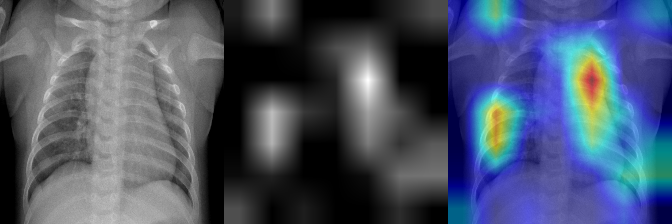

In [16]:
from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
import torchvision
# .models import resnet50
import torch
import cv2 
import numpy as np
import torch.nn as nn
import torchvision.transforms as T

from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image, preprocess_image
from PIL import Image

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model = torchvision.models.resnet50(weights=torchvision.models.ResNet50_Weights.DEFAULT).to(device)
# # modify fc layer
model.fc = nn.Linear(2048, 2).to(device) # number of classes -2 

img = cv2.imread('/home/akash/spring23_coursework/cap5516/a1/chest_xray/test/NORMAL/NORMAL2-IM-0272-0001.jpeg')
img = cv2.resize(img, (224, 224))
img = np.float32(img) / 255
input_tensor = preprocess_image(img, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]).to(device)

# The target for the CAM is the Bear category.
# As usual for classication, the target is the logit output
# before softmax, for that category.
targets = [ClassifierOutputTarget(0)]
print(targets, ClassifierOutputTarget(0))
target_layers = [model.layer4]
with GradCAM(model=model, target_layers=target_layers) as cam:
    grayscale_cams = cam(input_tensor=input_tensor, targets=targets)
    cam_image = show_cam_on_image(img, grayscale_cams[0, :], use_rgb=True)
cam = np.uint8(255*grayscale_cams[0, :])
cam = cv2.merge([cam, cam, cam])
images = np.hstack((np.uint8(255*img), cam , cam_image))
Image.fromarray(images)
